In [1]:
import numpy as np
import matplotlib.pyplot as plt
from polymer import Config, Polymer
import os
import time
import datetime

In [2]:
# test setup
# test simulation
# test analysis
# test saving
# test loading again

In [3]:
def plot_box(positions, l_box):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i in range(len(positions)):
        ax.scatter(positions[i, 0],positions[i, 1], positions[i, 2])
    
    xy = np.array(((0,0),
                    (l_box, 0),
                    (l_box, l_box),
                    (0, l_box),
                    (0,0)), dtype="float64")
    xy -= l_box/2

    ax.plot(xy[:, 0], xy[:, 1], zs=-l_box/2, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box/2, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=-l_box/2, zdir='y', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box/2, zdir='y', c="r")

In [4]:
# SET UP SYSTEM
cfg = Config.from_toml("/home/jan/Documents/masterthesis/project/mucus/cfg_test.toml")
p = Polymer(cfg)
p.create_box()

print("starting a simulation with following parameters:")
p.print_sim_info()

starting a simulation with following parameters:
steps = 20
stride = 1
number_of_beads = 40
nbeads = 10
nchains = 4
mobility = 0.001
rbead = 1.0
qbead = 0.0
force_constant = 100.0
epsilon_LJ = 0.25
sigma_LJ = 2.0
cutoff_LJ = 2.0
lB_debye = 36.737
c_S = 10.0
cutoff_debye = 0.05
lbox = 20.0
pbc = True
cutoff_pbc = 3.0
write_traj = True
cwd = '/home/jan/Documents/masterthesis/project/mucus'
name_sys = 'mesh_test_v7'
dir_output = '/home/jan/Documents/masterthesis/project/results/mesh_test'
simulation_time = None



Position
[[ 6.66666667  1.          6.66666667]
 [ 6.66666667  3.          6.66666667]
 [ 6.66666667  5.          6.66666667]
 [ 6.66666667  7.          6.66666667]
 [ 6.66666667  9.          6.66666667]
 [ 6.66666667 11.          6.66666667]
 [ 6.66666667 13.          6.66666667]
 [ 6.66666667 15.          6.66666667]
 [ 6.66666667 17.          6.66666667]
 [ 6.66666667 19.          6.66666667]
 [13.33333333  1.          6.66666667]
 [13.33333333  3.          6.66666667]
 [13.33333333  5.          6.66666667]
 [13.33333333  7.          6.66666667]
 [13.33333333  9.          6.66666667]
 [13.33333333 11.          6.66666667]
 [13.33333333 13.          6.66666667]
 [13.33333333 15.          6.66666667]
 [13.33333333 17.          6.66666667]
 [13.33333333 19.          6.66666667]
 [ 1.          6.66666667 13.33333333]
 [ 3.          6.66666667 13.33333333]
 [ 5.          6.66666667 13.33333333]
 [ 7.          6.66666667 13.33333333]
 [ 9.          6.66666667 13.33333333]
 [11.          6

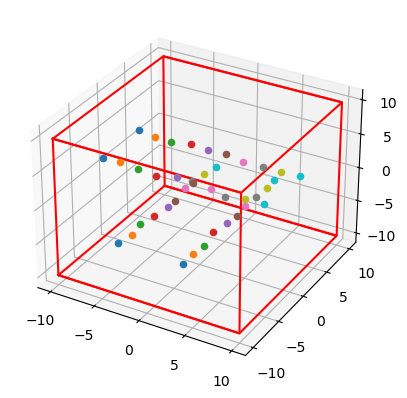

In [5]:
p.simulate()
p.get_forces_test(0) # get forces of first frame
plot_box(p.positions-p.box_length/2, p.box_length)

In [6]:
p.save_system()

In [7]:
# import mdtraj as md

# fname_traj = cfg1.dir_output + "/trajectories/traj_" + cfg1.name_sys + ".gro"
# fname_top = cfg1.dir_output + "/topologies/top_" + cfg1.name_sys + ".pdb"
# traj = md.load("/home/jan/Documents/masterthesis/project/mucus/trajectories/traj_120beeds_201frames_0.00005mu_v3.gro").xyz


In [8]:
# load system into new object

cfg_path = "/home/jan/Documents/masterthesis/project/results/mesh_test/configs/cfg_mesh_test.toml"

cfg1 = Config.from_toml(cfg_path)
p1 = Polymer(cfg1)

p1.load_traj_gro(overwrite=True)

In [9]:
# load traj

p1.print_sim_info()



steps = 20
stride = 1
number_of_beads = 40
nbeads = 10
nchains = 4
mobility = 0.001
rbead = 1.0
qbead = 0.0
force_constant = 100.0
epsilon_LJ = 0.25
sigma_LJ = 2.0
cutoff_LJ = 2.0
lB_debye = 36.737
c_S = 10.0
cutoff_debye = 0.05
lbox = 20.0
pbc = True
cutoff_pbc = 3.0
write_traj = True
cwd = '/home/jan/Documents/masterthesis/project/mucus'
name_sys = 'mesh_test_v8'
dir_output = '/home/jan/Documents/masterthesis/project/results/mesh_test'
simulation_time = 0.09288525581359863



In [11]:
p1.save_system()
p1.print_sim_info()

mesh_test
steps = 20
stride = 1
number_of_beads = 40
nbeads = 10
nchains = 4
mobility = 0.001
rbead = 1.0
qbead = 0.0
force_constant = 100.0
epsilon_LJ = 0.25
sigma_LJ = 2.0
cutoff_LJ = 2.0
lB_debye = 36.737
c_S = 10.0
cutoff_debye = 0.05
lbox = 20.0
pbc = True
cutoff_pbc = 3.0
write_traj = True
cwd = '/home/jan/Documents/masterthesis/project/mucus'
name_sys = 'mesh_test_v8'
dir_output = '/home/jan/Documents/masterthesis/project/results/mesh_test'
simulation_time = 0.09288525581359863



In [13]:
# calculate structure factor
r, gr = p1.rdf()
S, Sq = p1.get_structure_factor_rdf()


(2, 370)


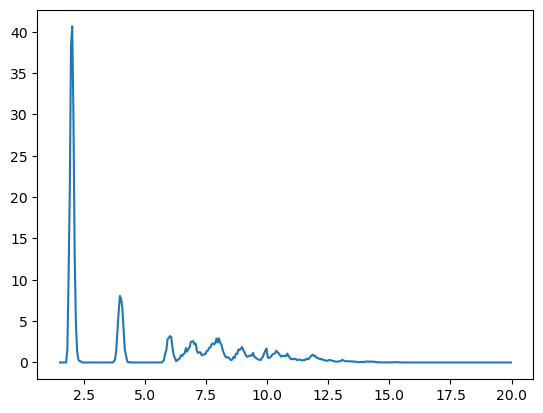

In [26]:
RDF =  np.array([r, gr])
SQ = np.array([S, Sq])

plt.figure()
plt.plot(*RDF)
plt.show()

plt.figure()
plt.plot(*SQ)
plt.show()

(1000,)
(1000,)
(2, 1000)
[[0.         0.002002   0.004004   ... 1.995996   1.997998   2.        ]
 [0.83203504 0.8320674  0.83216446 ... 0.99974028 0.99972461 0.99970938]]


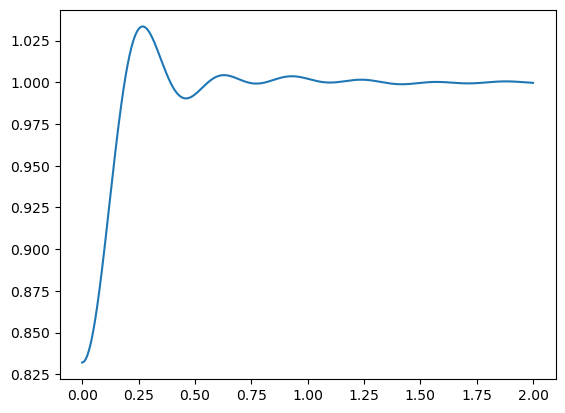

In [21]:
print(S.shape)
print(Sq.shape)

structure_factor = np.array([S, Sq])
print(structure_factor.shape)

print(structure_factor)

plt.figure()
plt.plot(*structure_factor)
plt.show()

In [24]:
dir_dict = {"trajectory": ("/trajectories/traj_", ".gro"),
            "topology": ("/topologies/top_", ".pdb"),
            "config": ("/configs/cfg_",".toml"),
            "bonds": ("/bonds/bonds_", ".npy"),
            "rdf": ("/results/rdf/rdf_", ".npy"),
            "strucutre_factor": ("/results/structure_factor/Sq_", ".npy")}

txt = "config"
print(dir_dict[txt][1])

.toml
